In [20]:
# Load libraries for Decision trees
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load libraries for Time Series Analysis
#Time Series Forecast 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta

In [19]:
#Decision Trees and Confusion Matrix

#Read in the dataset and display
dataset = pd.read_excel('DT_creditcard.xlsx')
print(dataset.head())

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['reports', 'income', 'expenditure'] #columns is the excel table or dataset 
X = dataset[feature_cols] # Features
Y = dataset['card'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Evaluate the accuracy of the model (or classifier) for prediction
# Model Accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 70% training set and 30% test set :",
          metrics.accuracy_score(y_test, y_pred))

#Percentage of accuracy
accuracy_percentage = metrics.accuracy_score(y_test, y_pred) * 100
print(f"Accuracy for 70% training set and 30% test set in percentage {round(accuracy_percentage, 1)}%")

# Create a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

#Confusion matrix
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

print("true negative: ", tn)
print("false negative: ", fn)
print("true positive: ", tp)
print("false positive: ", fp)

  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


Accuracy for 70% training set and 30% test set : 0.9823232323232324
Accuracy for 70% training set and 30% test set in percentage 98.2%
              precision    recall  f1-score   support

          no       0.93      0.99      0.96        81
         yes       1.00      0.98      0.99  

   Region  Country  State     City  Month  Day  Year  AvgTemperature  \
0  Africa  Algeria    NaN  Algiers      1    1  1995            64.2   
1  Africa  Algeria    NaN  Algiers      1    2  1995            49.4   
2  Africa  Algeria    NaN  Algiers      1    3  1995            48.8   
3  Africa  Algeria    NaN  Algiers      1    4  1995            46.4   
4  Africa  Algeria    NaN  Algiers      1    5  1995            47.9   

        Date  
0 1995-01-01  
1 1995-01-02  
2 1995-01-03  
3 1995-01-04  
4 1995-01-05  


   Region  Country  State     City  Month  Day  Year  AvgTemperature  \
0  Africa  Algeria    NaN  Algiers      1    1  1995            64.2   
1  Africa  Algeria    NaN  Algiers      1    2  1995            49.4   
2  Africa  Algeria    NaN  Algiers      1    3  1995            48.8   
3  Africa  Algeria    NaN  Algiers      1    4  1995            46.4   
4  Africa  Algeria    NaN  Algiers      1    5  1995            47.9   

        Date  
0 1995-01-01  
1 1995-01-02

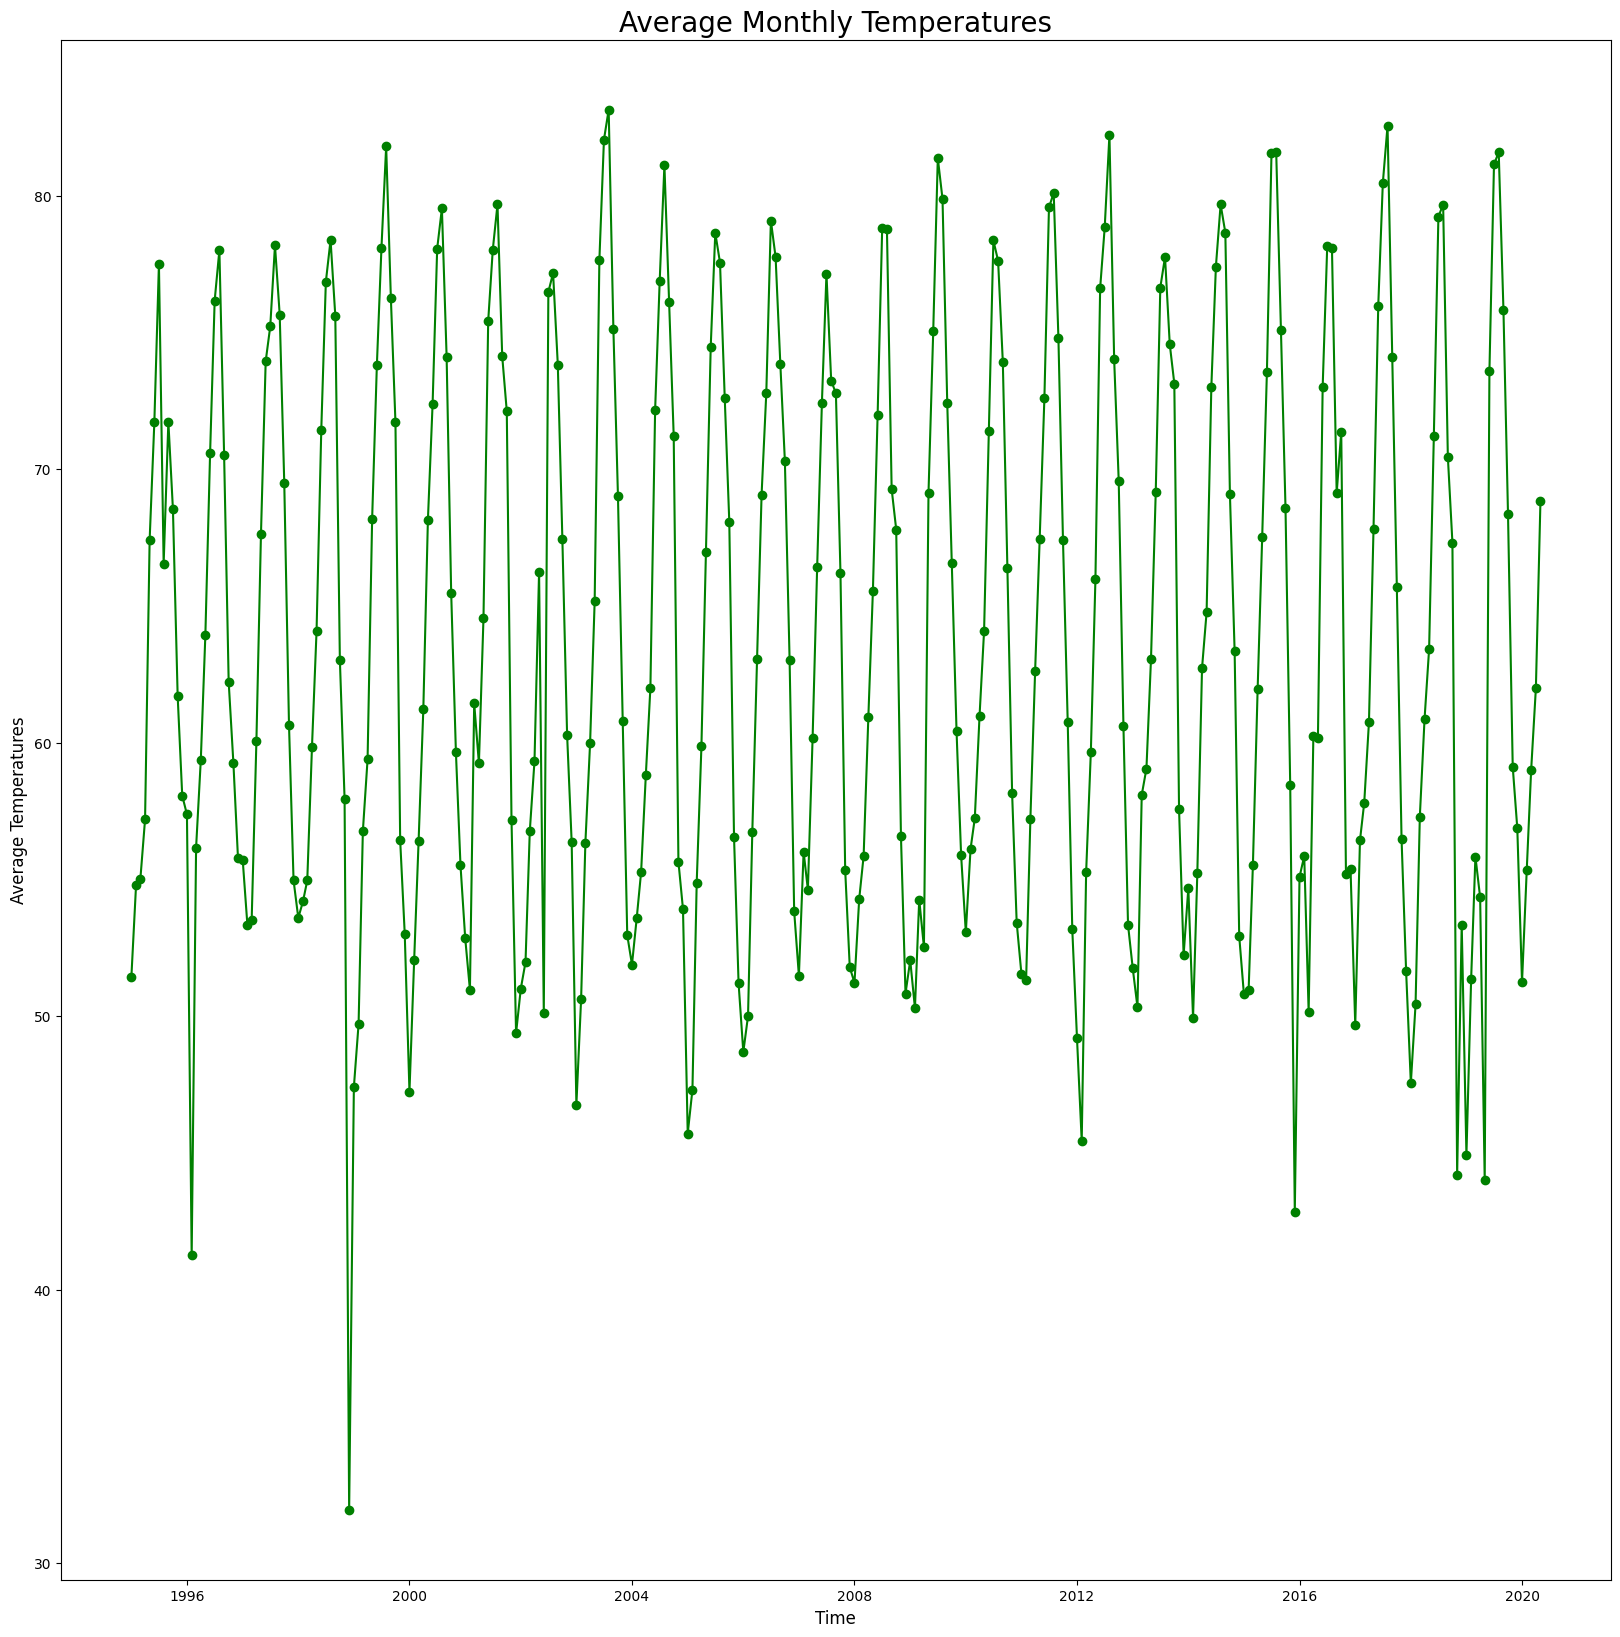

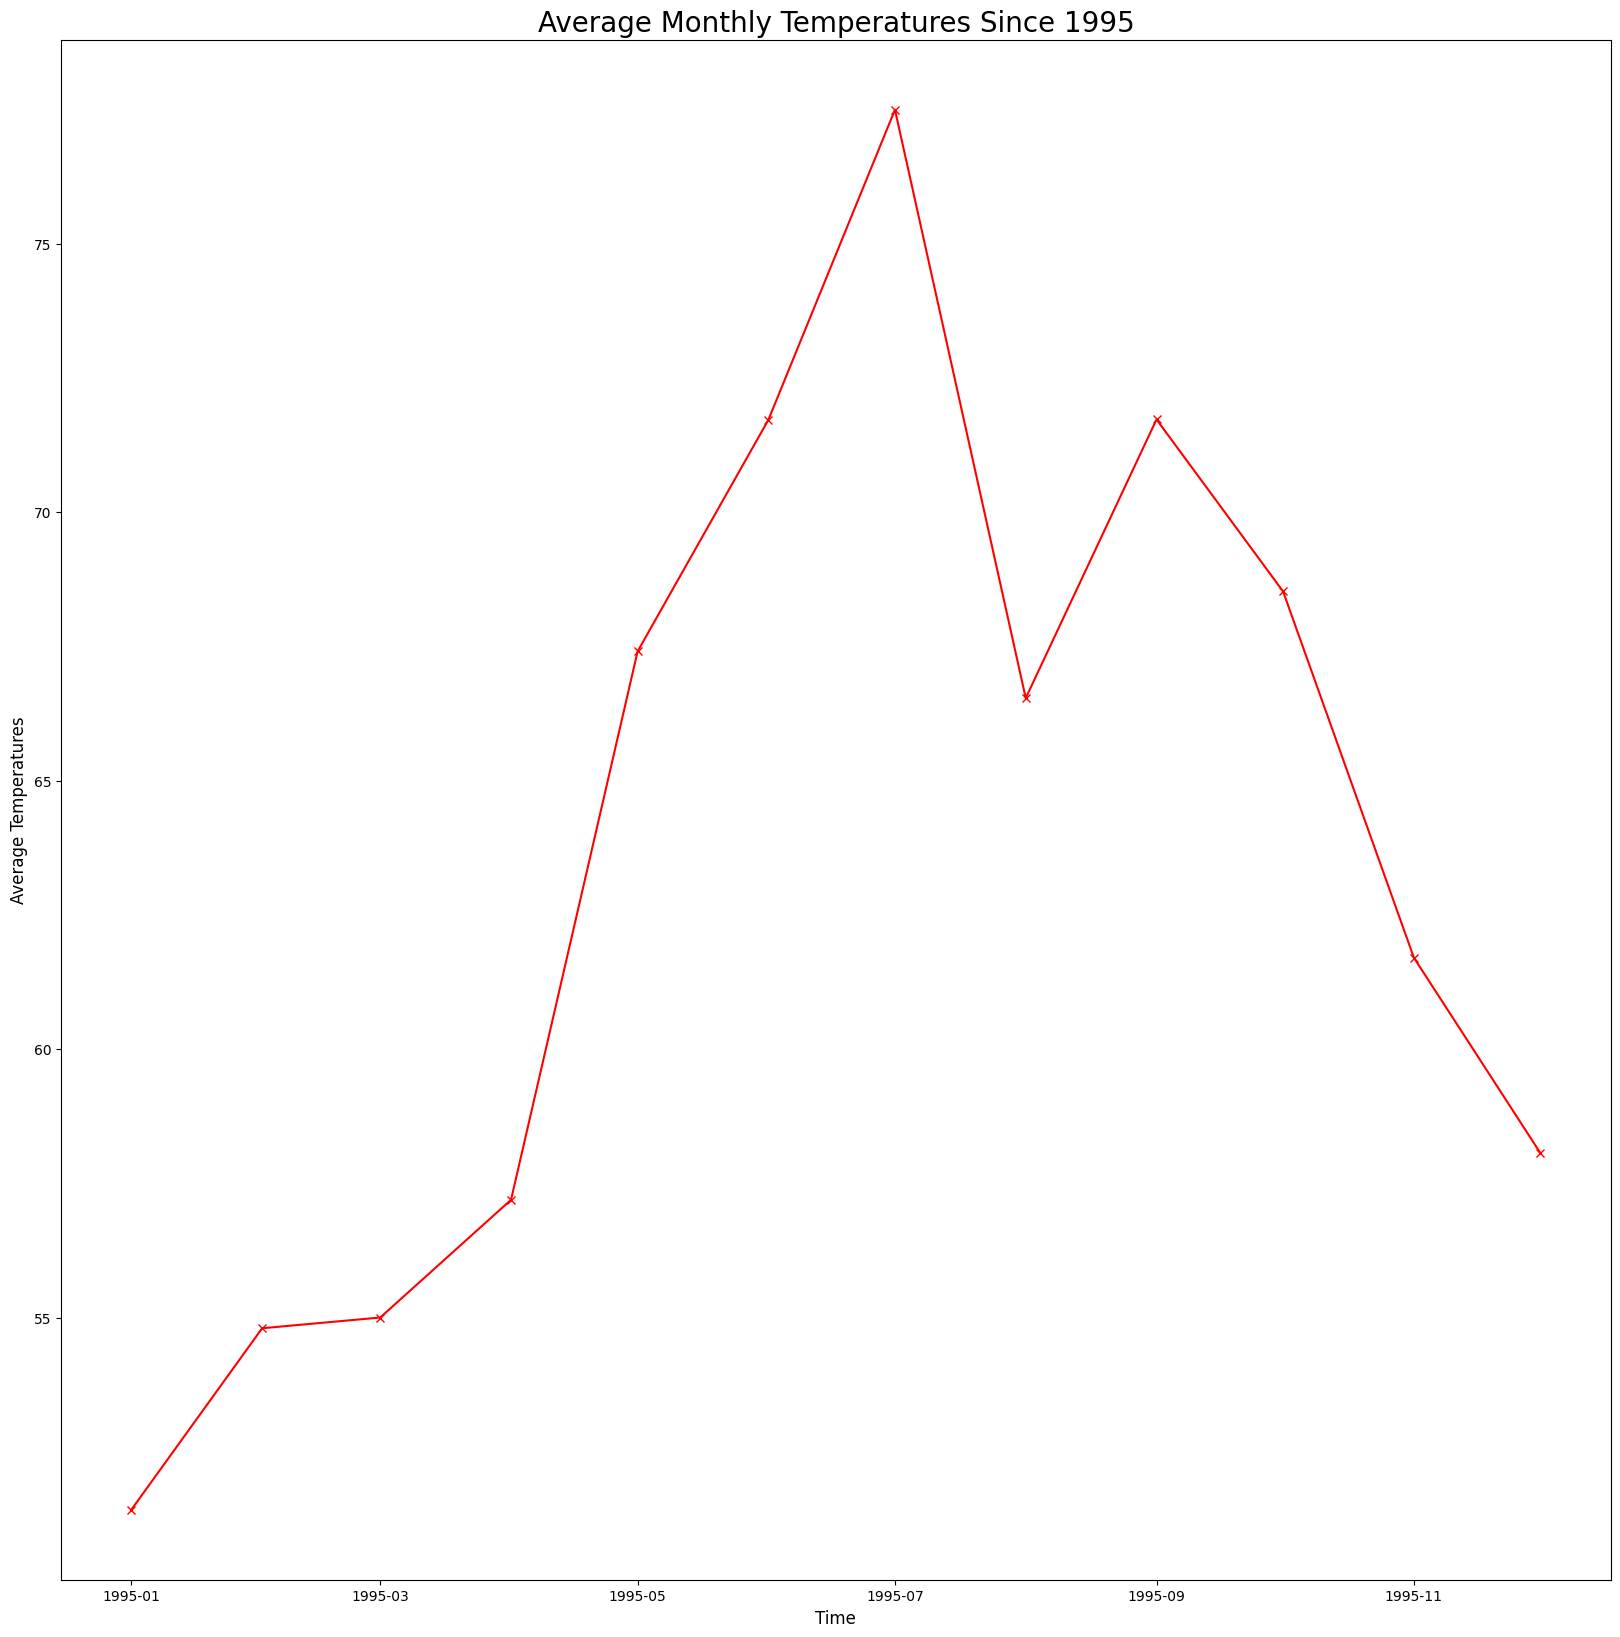

<Figure size 2000x2000 with 0 Axes>

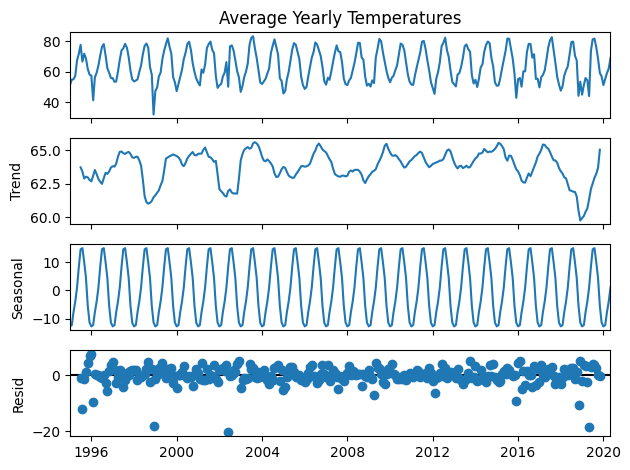

In [58]:
#Time Series Analysis
# Read the Excel file
dataset = pd.read_excel('small_city_temp.xlsx')

# Convert 'Date' column to datetime type
dataset['Date'] = pd.to_datetime(dataset['Date'])

print(dataset.head())
print("\n")

# Filter data for the specified city
city = dataset[dataset['City'] == 'Algiers']
print(city.head())
print("\n")

# Find the start and end date for temperature
print('The earliest and latest temperature dates are: ')
print(city['Date'].min(), city['Date'].max())
print("\n")

#Check whether there is any missing data for City
print(city.isnull().sum())
print("\n")

#Index Time Series Data, Order Date
city = city.set_index('Date')
print(city.index)
print("\n")

#We shall obtain the average temperatures for each month (MS)
month_average_temp = city['AvgTemperature'].resample('MS').mean()

# Set the display option to show all rows
# pd.set_option('display.max_rows', None)

#1995 city temperatures onwards
print("Average Temperature from 1995 onwards", month_average_temp['1995':])
print("\n")

# Reset the display option to its default value (if needed)
# pd.reset_option('display.max_rows')


#Plot the Average temperature Time Series Data for all the years
plt.figure(figsize=(20,20))
plt.plot(month_average_temp, color='green', marker='o')
plt.title("Average Monthly Temperatures", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average Temperatures", fontsize = 12)
plt.show()
 
#Plot the Average temperature Time Series for only 1995
plt.figure(figsize=(20,20))
plt.plot(month_average_temp['1995'], color='red', marker='x')
plt.title("Average Monthly Temperatures Since 1995", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average Temperatures", fontsize = 12)
plt.show()

#Plot the Average temperature Time Series Data for all the years
plt.figure(figsize=(20,20))
decomposition = sm.tsa.seasonal_decompose(month_average_temp, model='additive')
fig = decomposition.plot()
fig.get_axes()[0].set_title("Average Yearly Temperatures", fontsize=12)
plt.show()


In [ ]:
We can also visualise our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise (residual).